# Machine Learning - Regression

## load data

In [165]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
path = 'data/regress_data.csv'
data = pd.read_csv(path)
data.head()

,size,#room,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [153]:
data.describe()

,size,#room,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


# Liner regression with one variable

In [154]:
data = (data - data.mean()) / data.std()
data.head()

,size,#room,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [127]:
# set X (training data) and y (target variable)

X = data[['size']]
y = data[['price']]


In [128]:
X.head()

,size
0,0.130010
1,-0.504190
2,0.502476
3,-0.735723
4,1.257476


In [129]:
y.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [94]:
X = (X - X.mean()) / X.std()
X.head()

,size
0,0.130010
1,-0.504190
2,0.502476
3,-0.735723
4,1.257476


data distribution

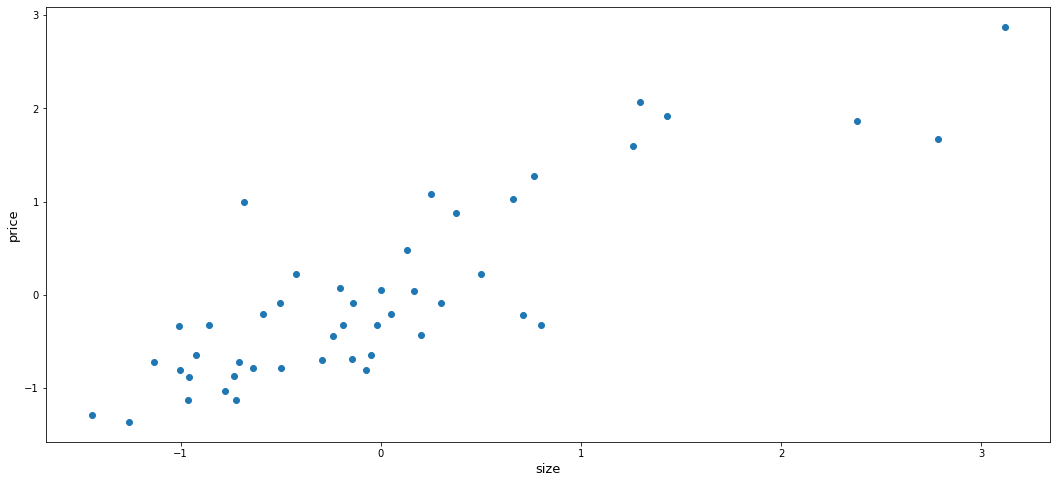

In [130]:
plt.rcParams["figure.figsize"] = (18,8)

plt.scatter(X, y)
plt.xlabel('size', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

Let us use gradient descent approach to minize the cost function

cost function:
$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
hypothesis/model：\\[{{h}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\] 

In [131]:
m = len(X)

def computeCost(X, y, w):
    inner = np.power(((X * w.T) - y), 2)# (m,n) @ (n, 1) -> (n, 1)
    
    return np.sum(inner) / (2 * m)

in order to vectorize the process of computation, we need to add a column vector (equal to 1) to the dataset

In [132]:
X.insert(0, 'ones', 1)
X.head()

,ones,size
0,1,0.130010
1,1,-0.504190
2,1,0.502476
3,1,-0.735723
4,1,1.257476


Initialize the parameters

Chec x (input) and y (target value)

In [133]:
X.head()

,ones,size
0,1,0.130010
1,1,-0.504190
2,1,0.502476
3,1,-0.735723
4,1,1.257476


In [134]:
y.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


initialize parameter w

In [135]:
X = np.matrix(X.values) # convert x to matrix
y = np.matrix(y.values) # convert y to matrix
w = np.matrix(np.array([0,0])) #initialize w

In [136]:
w

matrix([[0, 0]])

check dimention

In [137]:
X.shape, w.shape, y.shape

((47, 2), (1, 2), (47, 1))

calculate the cost function(initial w value is 0).

In [138]:
computeCost(X, y, w)

0.4893617021276595

# Batch Gradient Decent

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [139]:
def batch_gradientDescent(X, y, w, alpha, iters):
    temp = np.matrix(np.zeros(w.shape))
    parameters = int(w.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * w.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = w[0, j] - ((alpha / len(X)) * np.sum(term))

        w = temp
        cost[i] = computeCost(X, y, w)

    return w, cost

set learning rate - alpha
set maximum number iteration

In [140]:
alpha = 0.1
iters = 1000

run the gradient descent

In [141]:
w_new, cost = batch_gradientDescent(X, y, w, alpha, iters)
w_new

matrix([[-1.06829439e-16,  8.54987593e-01]])

after the training, let's calculate the cost function with last updated parameters

In [142]:
computeCost(X, y, w_new)

0.131636446139634

Visualize the fitting result

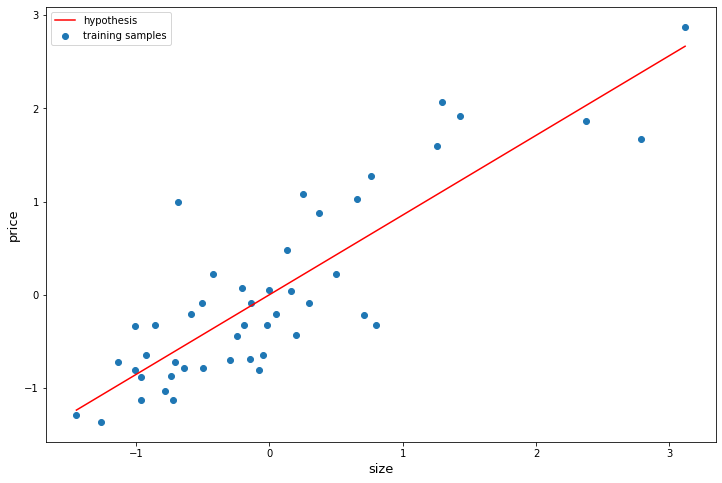

In [143]:
x = np.linspace(data['size'].min(), data['size'].max(), 100)
f = w_new[0, 0] + (w_new[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='hypothesis')
ax.scatter(data['size'], data['price'], label='training samples')
ax.legend(loc=2)
ax.set_xlabel('size', fontsize=13)
ax.set_ylabel('price', fontsize=13)
plt.show()

Cost function Vs. iterations

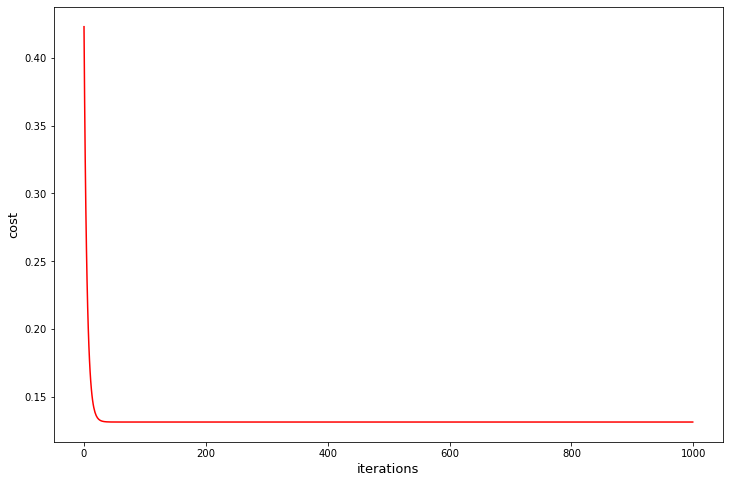

In [146]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('iterations', fontsize=13)
ax.set_ylabel('cost', fontsize=13)
plt.show()

## Multivariate Linear regression

In [155]:
data.head()

,size,#room,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [157]:
# add ones column
#data.insert(0, 'ones', 1)

# set X (training data) and y (target variable)
X2 = data[['ones','size','#room']]
y2 = data[['price']]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
w2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13068648053904192

Cost function Vs. iterations

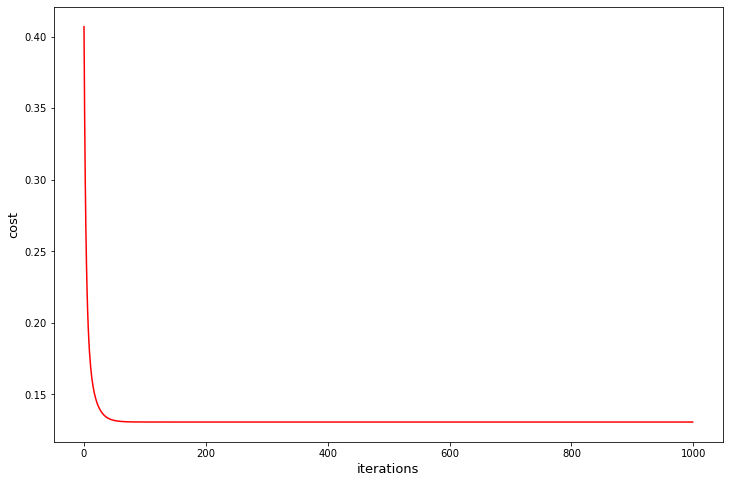

In [158]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('iterations', fontsize=13)
ax.set_ylabel('cost', fontsize=13)
plt.show()

## OR just use the existing library like "scikit-learn"

In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

scikit-learn model fitting result

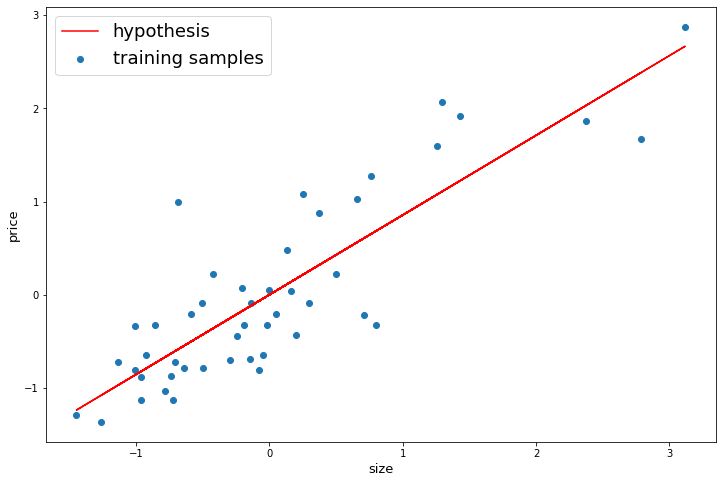

In [160]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='hypothesis')
ax.scatter(data['size'], data['price'], label='training samples')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('size', fontsize=13)
ax.set_ylabel('price', fontsize=13)
plt.show()

## $L_2$ regularization
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$， called`Ridge Regression`：

In [161]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)

Ridge()

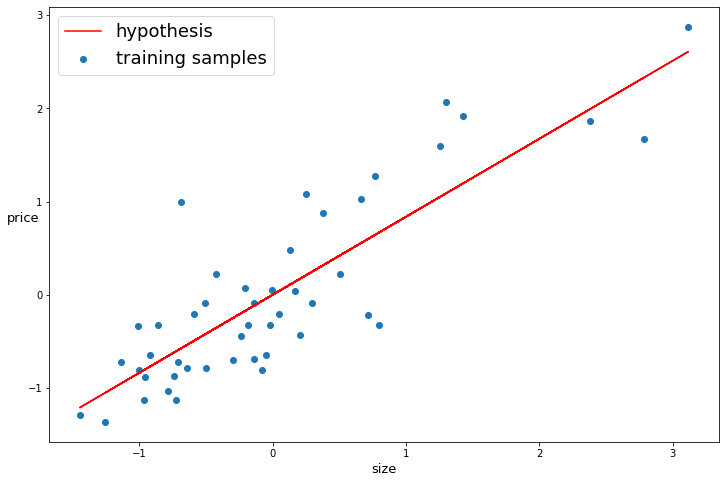

In [162]:
x2 = np.array(X[:, 1].A1)
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='hypothesis Ridge')
ax.scatter(data['size'], data['price'], label='training samples')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('size', fontsize=13)
ax.set_ylabel('price', rotation=0, fontsize=13)
plt.show()

## $L_1$ regularization：
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，called`Lasso Regression` 

In [163]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)

Lasso()

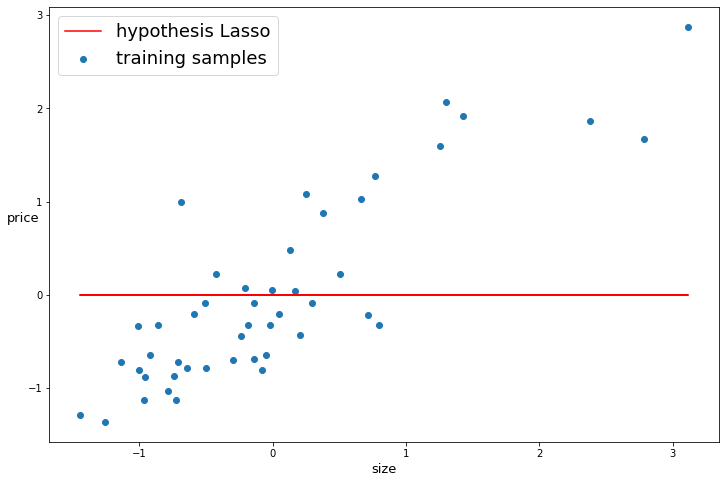

In [164]:
x3= np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='hypothesis Lasso')
ax.scatter(data['size'], data['price'], label='training samples')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('size', fontsize=13)
ax.set_ylabel('price', rotation=0, fontsize=13)
plt.show()